In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgcd74aPI6VIi2ERsv1tUlA-rquN-VgYVFvItnPQUAGv0OYE5oYk1w


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import random

from sklearn.preprocessing import LabelEncoder

In [ ]:
path = '/content/gdrive/MyDrive/Dataset/CJ AI/'

In [ ]:
march = pd.read_csv(path + 'march.csv', encoding = 'utf-8')
april = pd.read_csv(path + 'april.csv', encoding = 'utf-8')
may = pd.read_csv(path + 'may.csv', encoding = 'utf-8')
june = pd.read_csv(path + 'june.csv', encoding = 'utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = pd.concat((march, april, may, june), axis = 0)

In [ ]:
df

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16,00281,NaN,100,NaN,N,NaN,1.0,00281,00281,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676908,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17,00316,NaN,168,NaN,N,NaN,1.0,00316,00316,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676909,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18,00338,NaN,100,NaN,N,NaN,1.0,00338,00338,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676910,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19,00183,NaN,50,NaN,N,NaN,1.0,00183,00183,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [ ]:
columns = ['CORP_ID', 'BKG_DATE', 'SHPR_CD', 'ITEM_SEQ', 'ITEM_CD', 'ITEM_QTY', 'ITEM_AMT', 
           'BRAND_NM', 'POST_ZONE']
           # , 'SHPR_ADDR1', 'SHPR_ADDR1', 'CNEE_ADDR1', 'CNEE_ADDR1'
dataset = df[columns]

In [ ]:
dataset = dataset.dropna(axis = 0, how = 'any')

In [ ]:
category_columns = ['BRAND_NM', 'CORP_ID', 'ITEM_CD']
for i in category_columns:
  L_encoder = LabelEncoder()
  L_encoder.fit(dataset[i].astype(str))
  dataset[i] = L_encoder.transform(dataset[i].astype(str))

In [ ]:
# dataset['year'] = dataset['BKG_DATE'].astype(str).str[0:4].astype(int)
dataset['month'] = dataset['BKG_DATE'].astype(str).str[4:6].astype(int)
dataset['day'] = dataset['BKG_DATE'].astype(str).str[6:].astype(int)

In [ ]:
dataset = dataset.drop(columns = 'BKG_DATE')
Y_total = dataset['ITEM_QTY']

In [ ]:
dataset = (dataset - np.mean(dataset)) / np.std(dataset)

In [ ]:
X_total = dataset.drop(columns = 'ITEM_QTY')

In [ ]:
# 데이터 분리. train - 0.64, valid - 0.16, test_public = 0.1, test_private = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=123)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=123)
X_test_public, X_test_private, Y_test_public, Y_test_private = train_test_split(X_test, Y_test, test_size=0.5, random_state=123)

In [ ]:
X_train

,CORP_ID,SHPR_CD,ITEM_SEQ,ITEM_CD,ITEM_AMT,BRAND_NM,POST_ZONE,month,day
342849,0.337192,0.870897,-0.395664,-1.533200,-0.321078,0.516749,0.886460,-0.752316,1.416759
174285,0.337192,-1.231538,0.699689,1.196802,-0.536831,0.516749,-1.080908,1.043364,-1.070374
473007,0.337192,0.450410,0.699689,-0.703519,0.495083,0.516749,1.432952,1.043364,0.738450
133424,0.337192,-0.243394,0.699689,0.911787,-0.518338,0.516749,-1.299505,0.145524,-0.618168
128104,0.337192,-0.257410,-0.395664,-0.248964,-0.381489,0.516749,0.066723,0.145524,-0.731220
...,...,...,...,...,...,...,...,...,...
140266,-2.965668,1.592733,-0.395664,1.633113,1.641654,0.516749,-0.589066,1.043364,-1.070374
244773,0.337192,0.443402,0.699689,-0.353314,-0.395051,0.516749,-1.190207,-1.650156,0.964553
501804,0.337192,1.431547,-0.395664,-0.230720,-0.455461,0.516749,-0.479768,1.043364,0.173192
655338,-2.965668,2.090310,-0.395664,-1.483361,-0.540529,-1.849761,-1.026259,1.043364,1.529810


# Model part

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,Dot,Add,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD,Adamax
from tensorflow.keras.layers import Dense,Concatenate,Activation
from keras import backend as K

In [ ]:
def RMSE(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
def MAL(y_true, y_pred):
  return np.max(abs(y_true - y_pred))

In [ ]:
def model(n_nodes = 256):
  inputs = Input(shape=(9,))
  layer_1 = Dense(n_nodes, activation="relu")(inputs)

  layer_2 = Dense(n_nodes, activation="relu")(layer_1)
  layer_2 = Add()([layer_2, layer_1])

  layer_3 = Dense(n_nodes, activation="relu")(layer_2)
  layer_3 = Add()([layer_3, layer_2, layer_1])

  layer_4 = Dense(n_nodes, activation="relu")(layer_3)
  layer_4 = Add()([layer_4, layer_3, layer_2, layer_1])

  outputs = Dense(1, activation="linear")(layer_4)
  model = Model(inputs, outputs)
  model.compile(loss='mae', optimizer='adam', metrics = [RMSE])
  return model
model = model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 256)          2560        input_5[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 256)          65792       dense_20[0][0]                   
__________________________________________________________________________________________________
add_12 (Add)                    (None, 256)          0           dense_21[0][0]                   
                                                                 dense_20[0][0]             

In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 10000, epochs = 100)

Epoch 1/100
112/112 [==============================] - 3s 7ms/step - loss: 0.4403 - RMSE: 1.9531 - val_loss: 0.3329 - val_RMSE: 1.7766
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3239 - RMSE: 1.9307 - val_loss: 0.3045 - val_RMSE: 1.7612
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3192 - RMSE: 1.9223 - val_loss: 0.3070 - val_RMSE: 1.7525
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3132 - RMSE: 1.9242 - val_loss: 0.3043 - val_RMSE: 1.7518
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3126 - RMSE: 1.9016 - val_loss: 0.3005 - val_RMSE: 1.7481
Epoch 6/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3192 - RMSE: 1.9145 - val_loss: 0.3471 - val_RMSE: 1.7335
Epoch 7/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3144 - RMSE: 1.8955 - val_loss: 0.3214 - val_RMSE: 1.7376
Epoch 8/100
112/112 [==============================] - 

# 3월 EDA

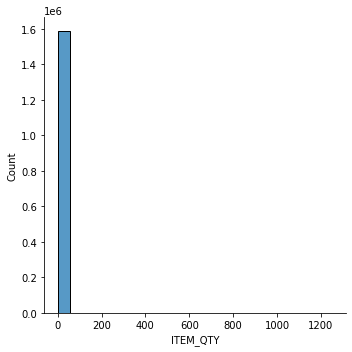

In [ ]:
sns.displot(df['ITEM_QTY'])

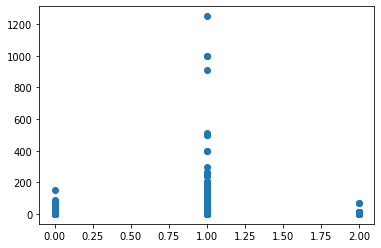

1    1245690
0     333256
2       6578
Name: BRAND_NM, dtype: int64


In [ ]:
plt.plot(df['BRAND_NM'], df['ITEM_QTY'], 'o')
plt.show()
print(df['BRAND_NM'].value_counts()) # 적어도 3월엔 3개의 종류의 상품만 존재함.

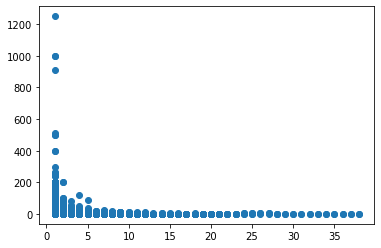

In [ ]:
plt.plot(df['ITEM_SEQ'], df['ITEM_QTY'], 'o')
plt.show()
# 시퀀스 값에 따라서 현저히 감소하는 추세를 확인할 수 있음!

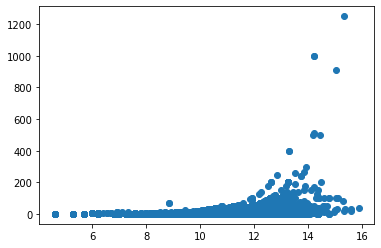

In [ ]:
plt.plot(np.log(df['ITEM_AMT']), df['ITEM_QTY'], 'o')
plt.show()
# 가격 스케일이 커서 로그를 씌우고 실행시킴.
# 전반적으로 가격이 커질수록 배송할 제품의 양이 커지는 효과를 볼 수 있음.
 

In [ ]:
df['SHPR_CD'].value_counts()

90001302    96484
90001542    47141
90001341    39549
90001541    32932
90001441    30209
90001443    21819
90001521     8802
90001381     2739
90001582      176
Name: SHPR_CD, dtype: int64

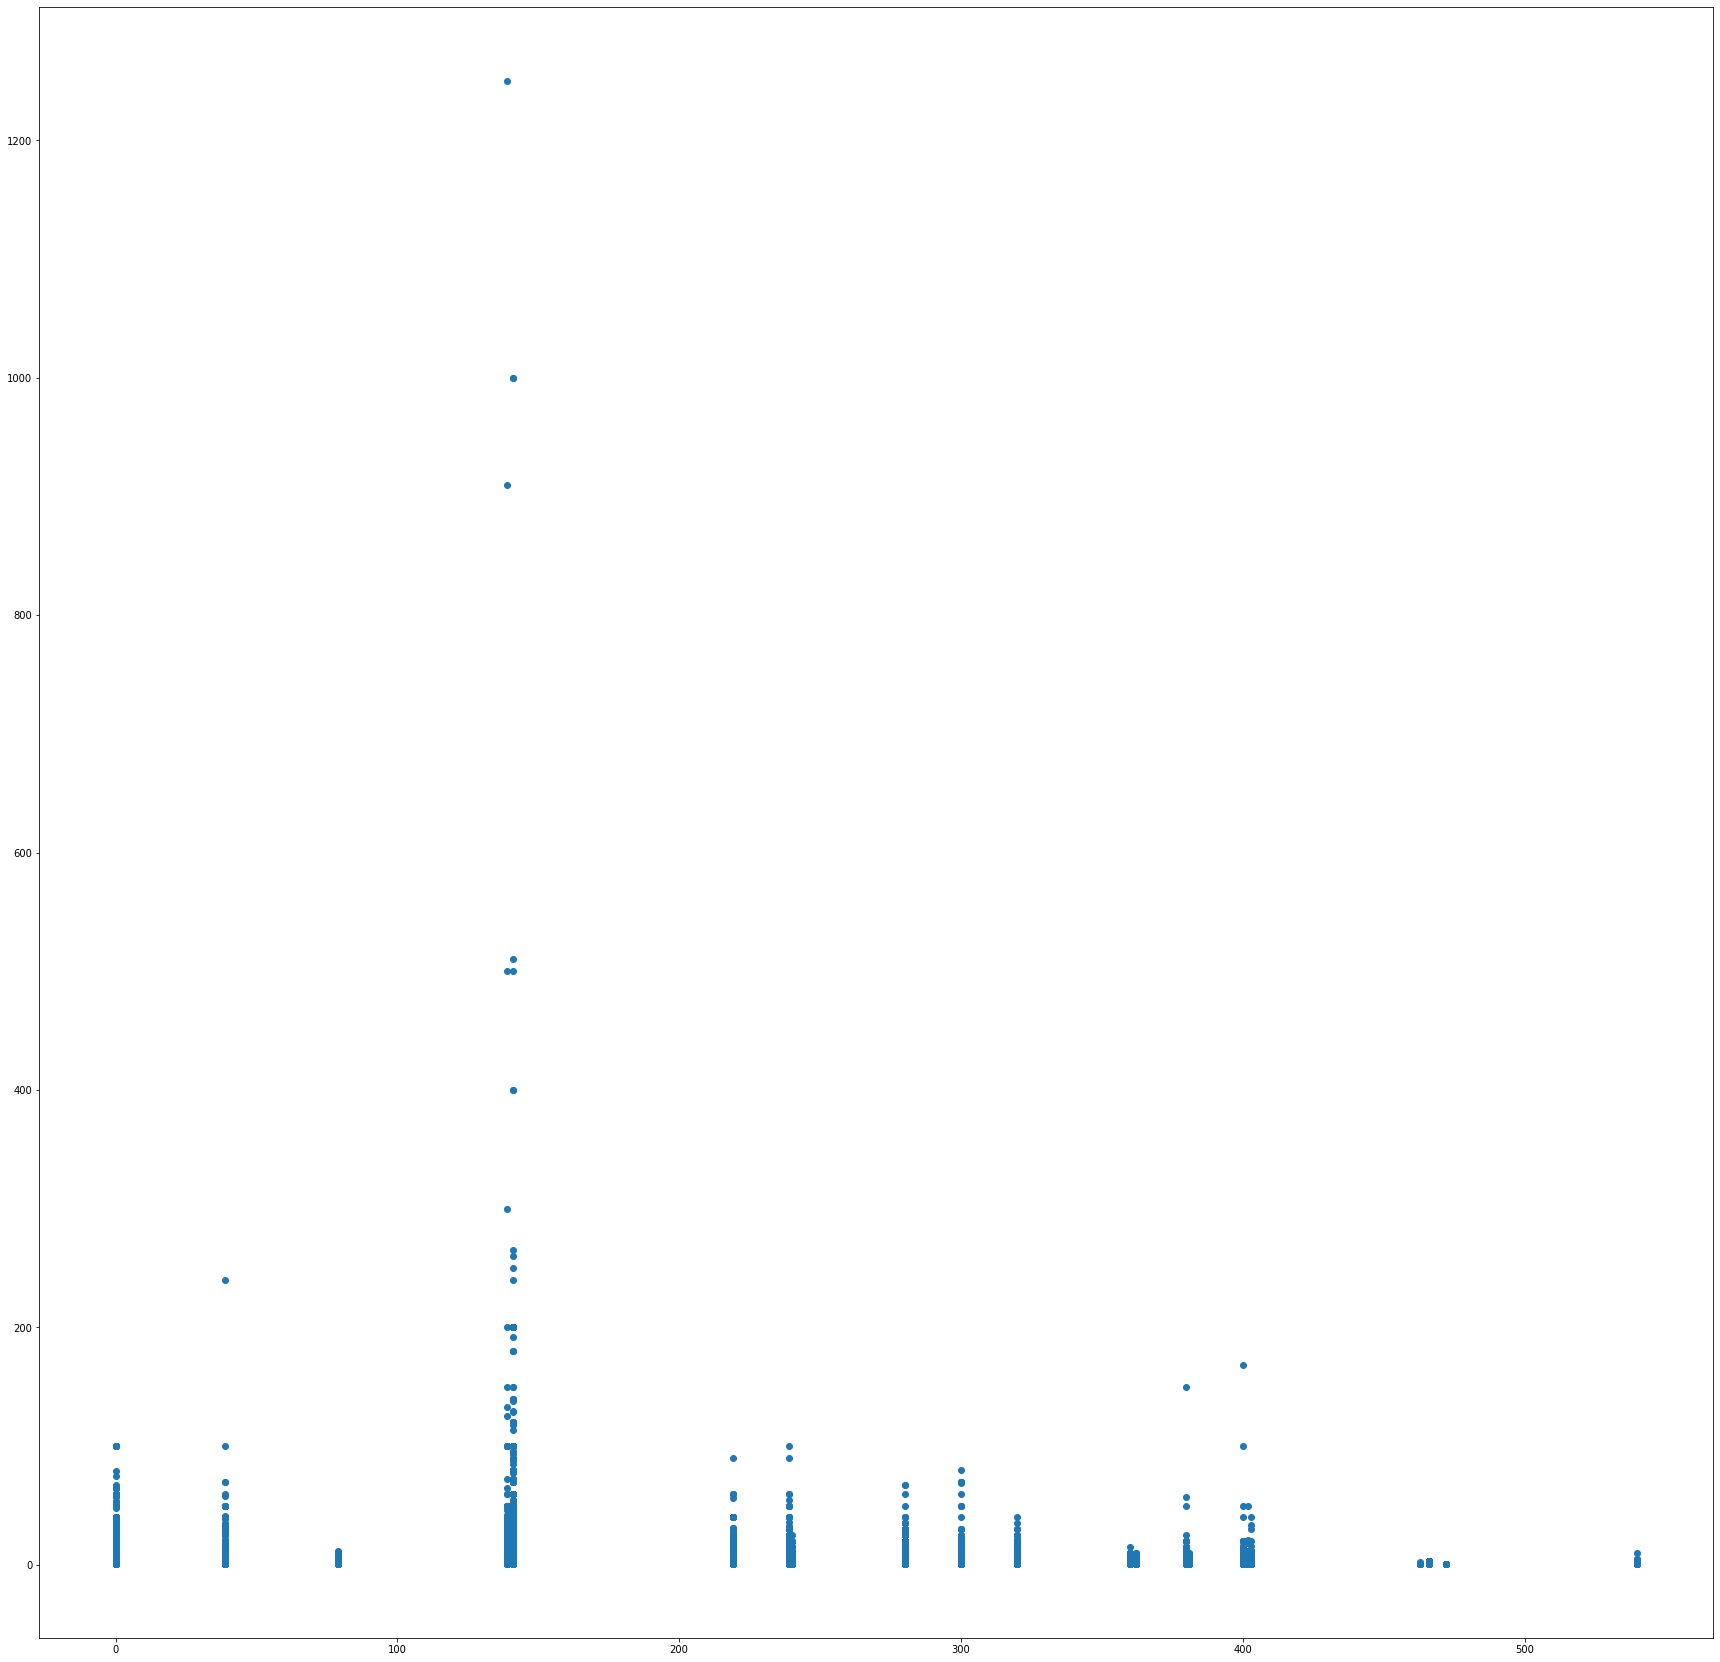

In [ ]:
k = df['SHPR_CD'] - df['SHPR_CD'].min()
plt.figure(figsize = (30,30))
plt.plot(k, df['ITEM_QTY'], 'o')
# 고객사 코드를 통한 eda, 확실히 고객사 별로 데이터 수도 다르고 분포 또한 다름을 알 수 있음. 
# 특히 특정 고객사의 주문량이 폭주하는 모습을 볼 수 있다. 

In [ ]:
march['ITEM_CD'].value_counts() # 주문 코드가 동일한 주문이 많다? 한번에 배송을 하는 것을 의미하는 걸까?

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(df['ITEM_CD'])
df['ITEM_CD'] = L_encoder.transform(df['ITEM_CD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
march['ITEM_CD'].value_counts()

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

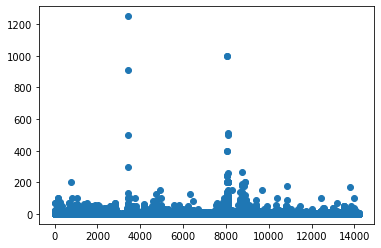

In [ ]:
plt.plot(df['ITEM_CD'], df['ITEM_QTY'], 'o')
# 주문코드 별로 분포가 상이하게 다른? 모습을 볼 수 있다. 좀 더 자세히 볼 필요가 있을것 같다.

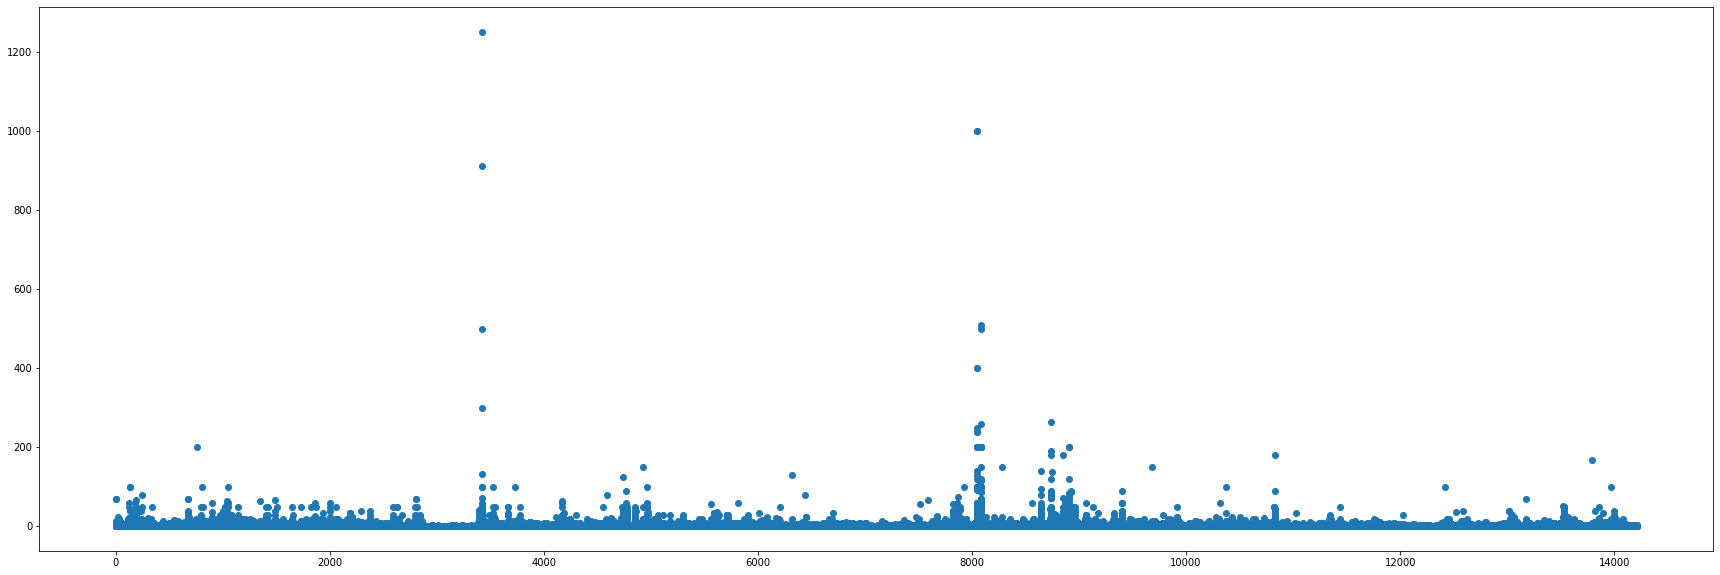

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(df['ITEM_CD'], df['ITEM_QTY'], 'o')
# 주문 코드별 수량을 봤는데, 특정 주문 코드에서 주문이 폭발적으로 증가.
# 아마도 고객사와 연계하면 더 좋게 될지도? 
# 하지만 주문코드는 주문할 때마다 달라지지 않을까? 그러면 의미가 퇴색될 가능성이 높아질 것이다.

groupby 를 써서 휴일 / 평일 나눠서 eda를 해봅시다!

In [ ]:
df['BKG_DATE'].value_counts().head(10) # 적어도 3월엔 3개의 종류의 상품만 존재함.

20210517    34566
20210608    33511
20210613    33060
20210420    29564
20210323    29299
20210607    29253
20210628    24813
20210531    24032
20210516    22767
20210617    22129
Name: BKG_DATE, dtype: int64

In [ ]:
df['BKG_DATE'].astype(str).str[6:].astype(int)

1          3
2          3
3          3
4          3
5          3
          ..
676881    30
676885    29
676886    30
676887    30
676892    29
Name: BKG_DATE, Length: 1585524, dtype: int64

In [ ]:
df['year'] = df['BKG_DATE'].astype(str).str[0:4].astype(int)
df['month'] = df['BKG_DATE'].astype(str).str[4:6].astype(int)
df['day'] = df['BKG_DATE'].astype(str).str[6:].astype(int)

In [ ]:
df['weekend'] = df['day'].apply(lambda x : 1 if x % 7 == 6 else (1 if x % 7 == 0 else 0))

In [ ]:
df['holiday'] = df['day'].apply(lambda x : 1 if x == 1 else 0)

In [ ]:
df

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,year,month,day,weekend,holiday
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,2021,3,3,0,0
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,2021,3,3,0,0
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,2021,3,3,0,0
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,2021,3,3,0,0
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,2021,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16,00281,NaN,100,NaN,N,NaN,1.0,00281,00281,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN,2021,6,28,1,0
676908,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17,00316,NaN,168,NaN,N,NaN,1.0,00316,00316,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN,2021,6,28,1,0
676909,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18,00338,NaN,100,NaN,N,NaN,1.0,00338,00338,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN,2021,6,28,1,0
676910,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19,00183,NaN,50,NaN,N,NaN,1.0,00183,00183,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN,2021,6,28,1,0


In [ ]:
print(df['weekend'].value_counts())
print(df['holiday'].value_counts())

0    1311876
1     474498
Name: weekend, dtype: int64
0    1738744
1      47630
Name: holiday, dtype: int64


KeyError: ignored

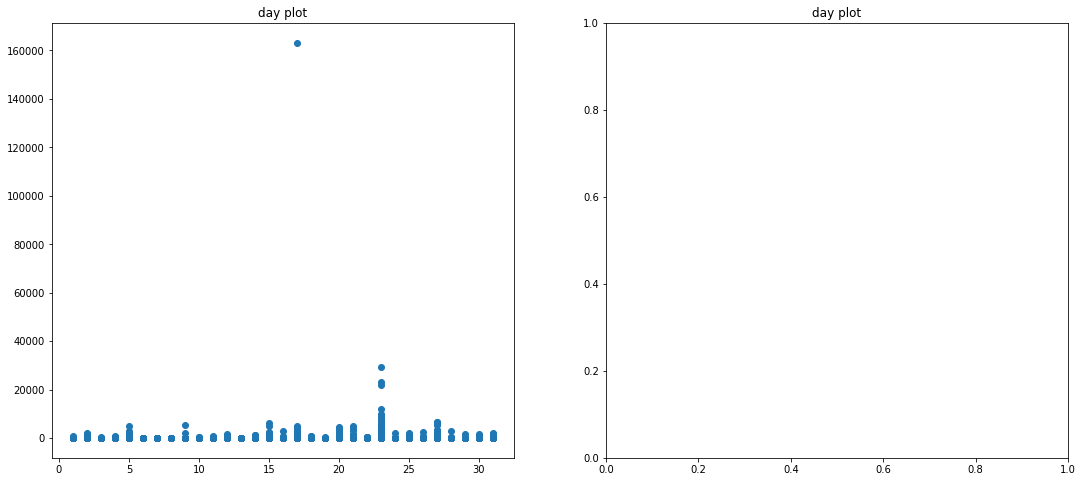

In [ ]:
plt.figure(figsize = (48,8))
plt.subplot(1,5,1)
plt.title('day plot')
plt.plot(df['day'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('day plot')
plt.plot(df['weekend'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('holiday plot')
plt.plot(df['holiday'], df['ITEM_QTY'], 'o')

In [ ]:
march.groupby('weekend').mean()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE,month,day,year,holiday,monday,tuesday,wednesday,thursday,friday,saturday,sunday,1st_week,2nd_week,3rd_week,4th_week,last_week
weekend,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.0,2.021032e+07,94234.035997,9.000141e+07,56942.850602,1.401347,1.310464,39782.067416,2.021032e+13,1.0,2.021032e+07,145590.623619,25.365332,3.0,16.514218,2021.0,0.034883,0.239318,0.28518,0.194186,0.135949,0.145367,0.00000,0.00000,0.236220,0.142358,0.155674,0.337936,0.206335
1,7.0,2.021032e+07,97023.010843,9.000141e+07,58330.958513,1.349999,1.293451,43707.375660,2.021032e+13,1.0,2.021032e+07,143132.563724,24.999142,3.0,17.968833,2021.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.43721,0.56279,0.206558,0.251964,0.246963,0.294515,0.294515


In [ ]:
df['monday'] = df['day'].apply(lambda x : 1 if x % 7 == 1 else 0)
df['tuesday'] = df['day'].apply(lambda x : 1 if x % 7 == 2 else 0)
march['wednesday'] = march['day'].apply(lambda x : 1 if x % 7 == 3 else 0)
march['thursday'] = march['day'].apply(lambda x : 1 if x % 7 == 4 else 0)
march['friday'] = march['day'].apply(lambda x : 1 if x % 7 == 5 else 0)
march['saturday'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else 0)
march['sunday'] = march['day'].apply(lambda x : 1 if x % 7 == 0 else 0)

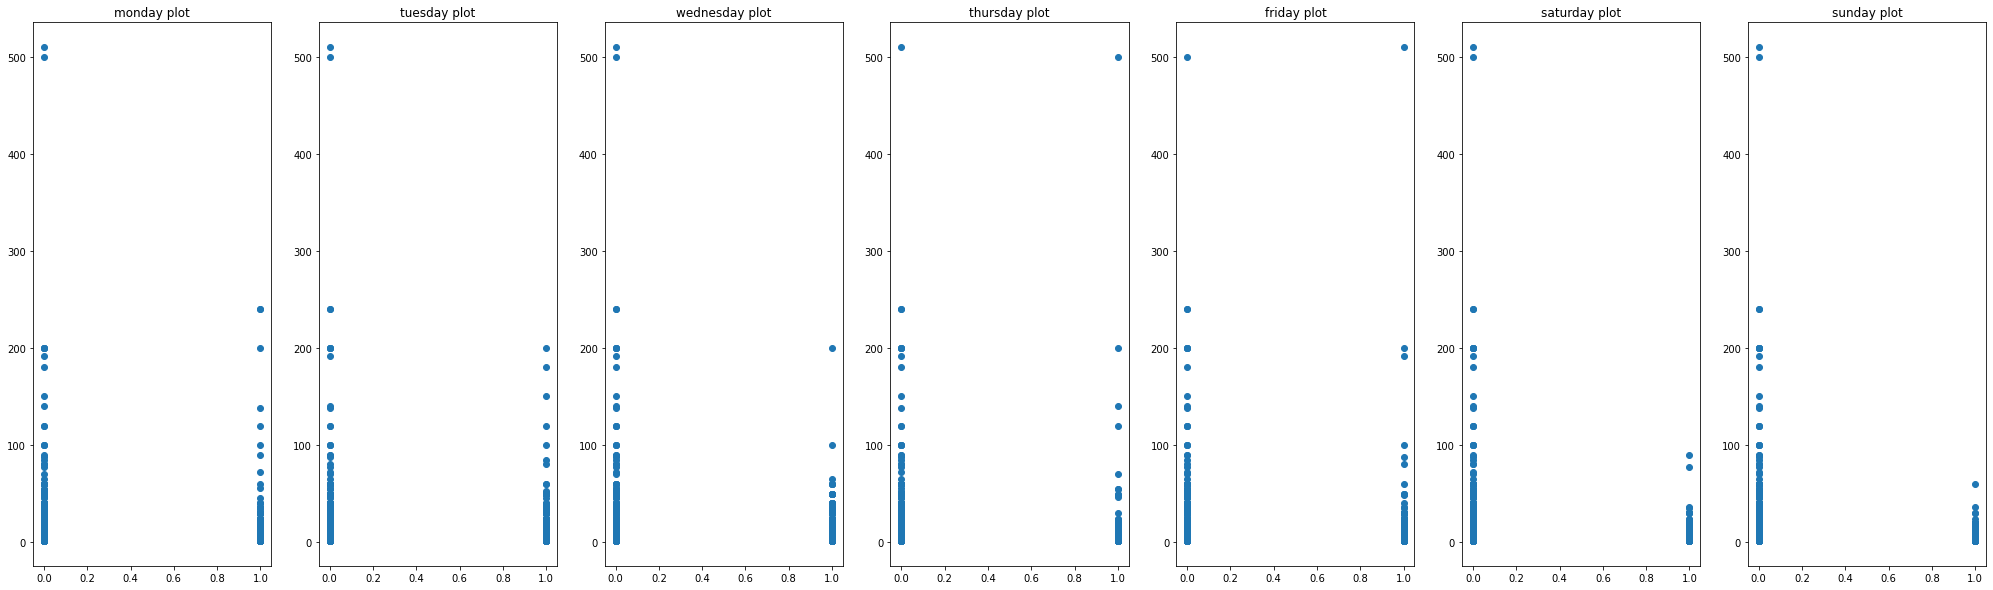

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,7,1)
plt.title('monday plot')
plt.plot(march['monday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,2)
plt.title('tuesday plot')
plt.plot(march['tuesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,3)
plt.title('wednesday plot')
plt.plot(march['wednesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,4)
plt.title('thursday plot')
plt.plot(march['thursday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,5)
plt.title('friday plot')
plt.plot(march['friday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,6)
plt.title('saturday plot')
plt.plot(march['saturday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,7)
plt.title('sunday plot')
plt.plot(march['sunday'], march['ITEM_QTY'], 'o')

In [ ]:
df['1st_week'] = df['day'].apply(lambda x : 1 if x <= 7 else 0)
df['2nd_week'] = df['day'].apply(lambda x : 1 if 8 <= x <= 14 else 0)
df['3rd_week'] = df['day'].apply(lambda x : 1 if 15 <= x <= 21 else 0)
df['4th_week'] = df['day'].apply(lambda x : 1 if 22 <= x <= 28 else 0)
df['last_week'] = df['day'].apply(lambda x : 1 if x >= 25 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

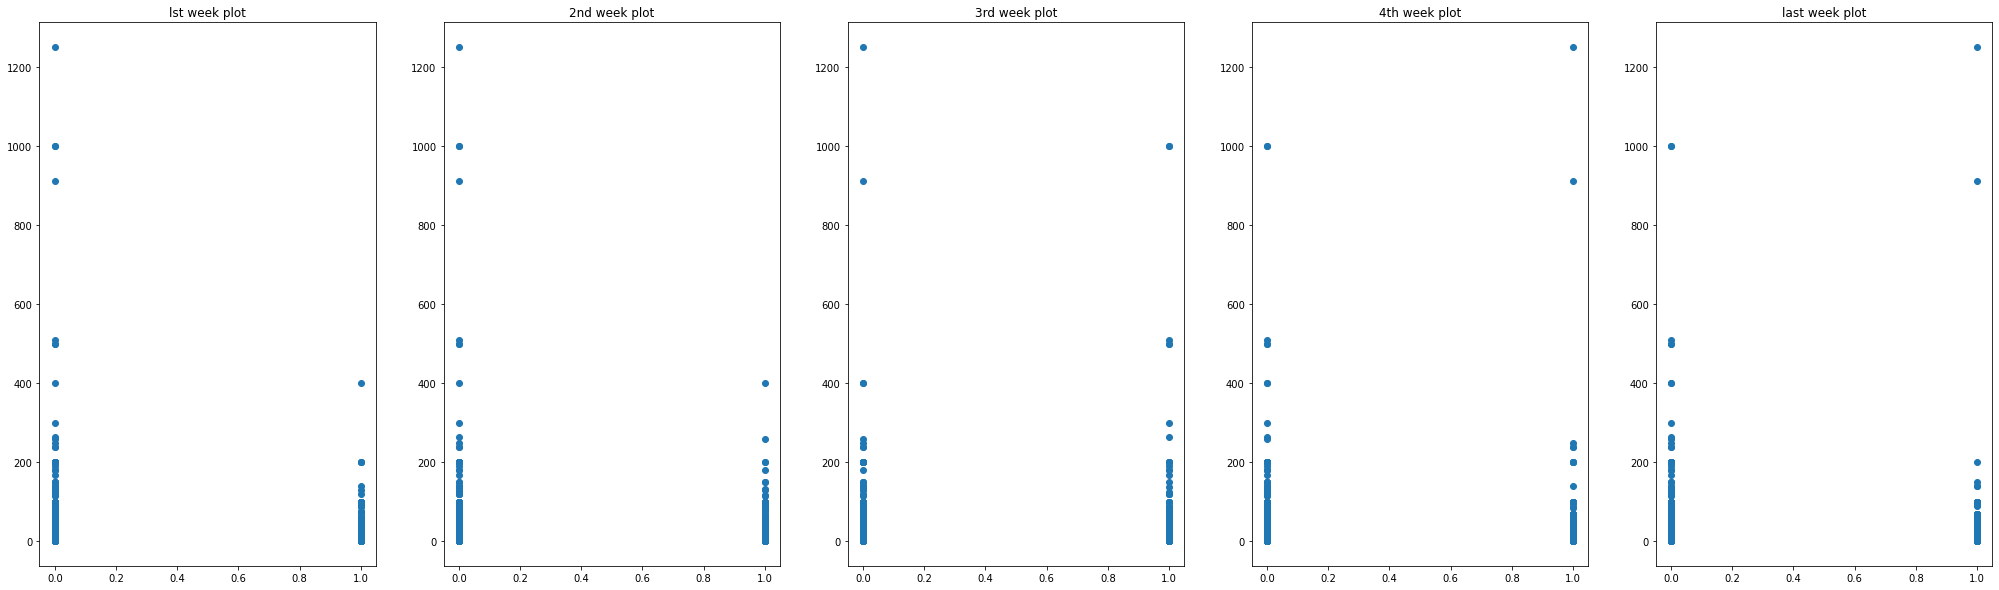

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,5,1)
plt.title('lst week plot')
plt.plot(df['1st_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('2nd week plot')
plt.plot(df['2nd_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('3rd week plot')
plt.plot(df['3rd_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,4)
plt.title('4th week plot')
plt.plot(df['4th_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,5)
plt.title('last week plot')
plt.plot(df['last_week'], df['ITEM_QTY'], 'o')

In [ ]:
Y_test_private

608810    1
292206    1
219571    4
174970    1
139648    1
         ..
463209    1
160935    1
122546    1
44179     1
257194    5
Name: ITEM_QTY, Length: 174442, dtype: int64

In [ ]:
predict = model.predict(X_test_private)

In [ ]:
RMSE(predict, Y_test_pr)

(174442, 1)

In [ ]:
# hj = Input(shape=(1,))
# sex = Input(shape=(1,))
# age = Input(shape=(1,))
# item_buz = Input(shape=(1,))

# K = 200

# #U_embedding = Embedding(2000,K,embeddings_regularizer=l2())(unit) #user를 특정 할 수 있는 정보가 있을 때 사용
# H_embedding = Embedding(H,K,embeddings_regularizer=l2())(hj)
# S_embedding = Embedding(S,K,embeddings_regularizer=l2())(sex)
# A_embedding = Embedding(A,K,embeddings_regularizer=l2())(age)
# I_embedding = Embedding(I,K,embeddings_regularizer=l2())(item_buz)

# #user_bias = Embedding(U.max()+1,1,embeddings_regularizer=l2())(user) #user를 특정 할 수 있는 정보가 있을 때 사용
# sex_bias = Embedding(S,1,embeddings_regularizer=l2())(sex)
# age_bias = Embedding(A,1,embeddings_regularizer=l2())(age)
# hj_bias = Embedding(H,1,embeddings_regularizer=l2())(hj)
# item_bias = Embedding(I,1,embeddings_regularizer=l2())(item_buz)
# from tensorflow.keras.layers import Dense,Concatenate,Activation

# #U_embedding = Flatten()(U_embedding)
# H_embedding = Flatten()(H_embedding)
# S_embedding = Flatten()(S_embedding)
# A_embedding = Flatten()(A_embedding)
# I_embedding = Flatten()(I_embedding)

# #user_bias = Flatten()(user_bias)
# sex_bias = Flatten()(sex_bias)
# age_bias = Flatten()(age_bias)
# hj_bias = Flatten()(hj_bias)
# item_bias = Flatten()(item_bias)

# #user_bias 와 U_embedding을 user를 특정 할 수 있는 정보가 있다면 추가하면 좋다. => 더 높은 정확성과, 적은 오류를 가질 것이다.
# R = Concatenate()([S_embedding,A_embedding,H_embedding,I_embedding,sex_bias,age_bias,hj_bias,item_bias])

# R = Dense(2048)(R)
# R = Activation('relu')(R)
# R = Dense(256)(R)
# R = Activation('relu')(R)
# R = Dense(1)(R) #소비 점수를 output으로 가져온다(정확한 평가 지표가 있었다면, 조금 더 좋았을 것)

# model = Model(inputs=[sex,age,hj,item_buz],outputs=R)
# model.compile(
#     loss = RMSE,
#     optimizer = 'Adam',
#     metrics = [RMSE]
# )

# model.summary()

# 3월 EDA

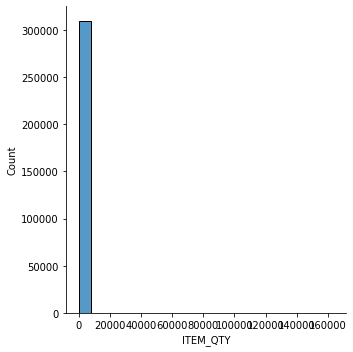

In [ ]:
sns.displot(march['ITEM_QTY'])

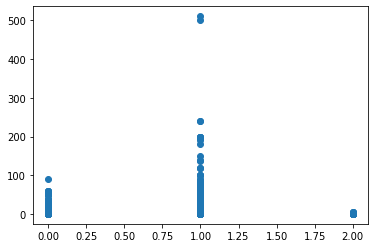

1    231851
0     47417
2       583
Name: BRAND_NM, dtype: int64


In [ ]:
plt.plot(march['BRAND_NM'], march['ITEM_QTY'], 'o')
plt.show()
print(march['BRAND_NM'].value_counts()) # 적어도 3월엔 3개의 종류의 상품만 존재함.

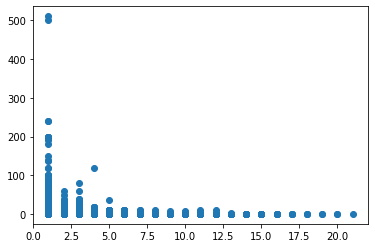

1     218001
2      36433
3      14233
4       6026
5       2435
6       1234
7        734
8        395
9        141
10        76
11        49
12        33
13        22
14        12
15         9
16         6
17         4
18         3
20         2
19         2
21         1
Name: ITEM_SEQ, dtype: int64


In [ ]:
plt.plot(march['ITEM_SEQ'], march['ITEM_QTY'], 'o')
plt.show()
print(march['ITEM_SEQ'].value_counts())
# 시퀀스 값에 따라서 현저히 감소하는 추세를 확인할 수 있음!

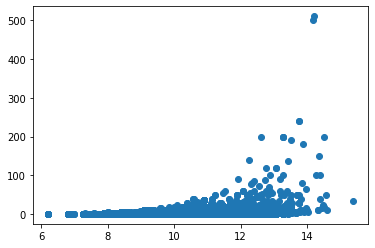

In [ ]:
plt.plot(np.log(march['ITEM_AMT']), march['ITEM_QTY'], 'o')
plt.show()
# 가격 스케일이 커서 로그를 씌우고 실행시킴.
# 전반적으로 가격이 커질수록 배송할 제품의 양이 커지는 효과를 볼 수 있음.
 

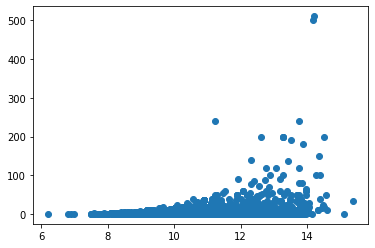

In [ ]:
plt.plot(np.log(march['INV_AMT']), march['ITEM_QTY'], 'o')
plt.show()

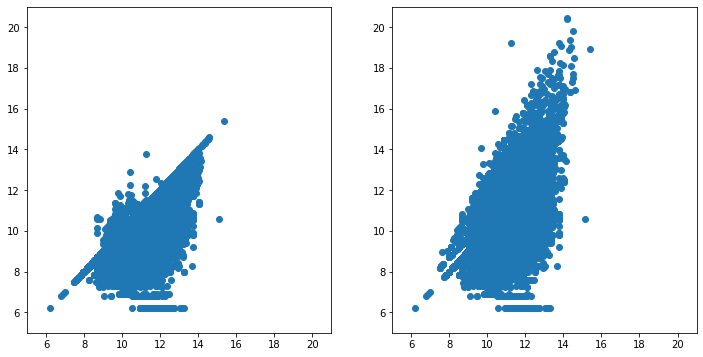

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.subplot(1,2,2)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 품목 금액은 주문 금액과 비례하는 성질을 가짐.
# 그리고 혹시나 해서 품목금액과 수량의 곱을 적용해 보았지만, 기존의 것이 더 설득력있는 분석임을 확인함.
# 그런데 주문금액과 품목 금액간 차이가 나는 이유는? 대체적으로 주문금액 > 품목금액이지만, 그렇지 않은 케이스도 존재함.

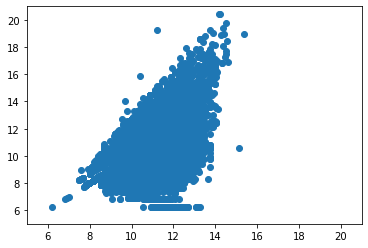

In [ ]:
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 

In [ ]:
march['SHPR_CD'].value_counts()

90001302    96484
90001542    47141
90001341    39549
90001541    32932
90001441    30209
90001443    21819
90001521     8802
90001381     2739
90001582      176
Name: SHPR_CD, dtype: int64

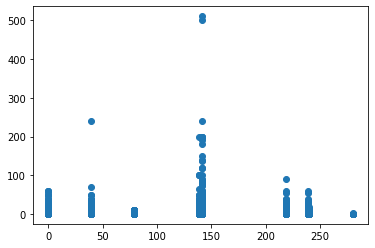

In [ ]:
k = march['SHPR_CD'] - march['SHPR_CD'].min()
plt.plot(k, march['ITEM_QTY'], 'o')
# 고객사 코드를 통한 eda, 확실히 고객사 별로 데이터 수도 다르고 분포 또한 다름을 알 수 있음. 
# 특히 특정 고객사의 주문량이 폭주하는 모습을 볼 수 있다. 

In [ ]:
march['ITEM_CD'].value_counts() # 주문 코드가 동일한 주문이 많다? 한번에 배송을 하는 것을 의미하는 걸까?

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(march['ITEM_CD'])
march['ITEM_CD'] = L_encoder.transform(march['ITEM_CD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
march['ITEM_CD'].value_counts()

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

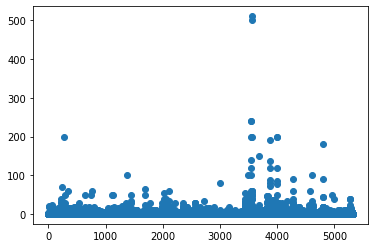

In [ ]:
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
# 주문코드 별로 분포가 상이하게 다른? 모습을 볼 수 있다. 좀 더 자세히 볼 필요가 있을것 같다.

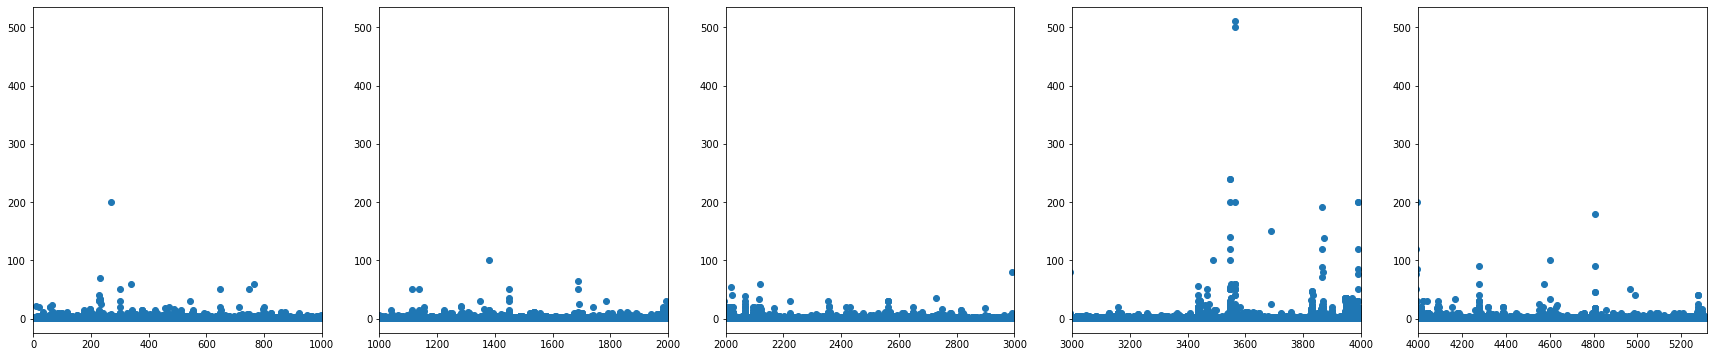

In [ ]:
plt.figure(figsize = (30,6))
plt.subplot(1,5,1)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(0, 1000)
plt.subplot(1,5,2)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(1000, 2000)
plt.subplot(1,5,3)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(2000, 3000)
plt.subplot(1,5,4)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(3000, 4000)
plt.subplot(1,5,5)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(4000, march['ITEM_CD'].max())
plt.show()
# 주문 코드별 수량을 봤는데, 특정 주문 코드에서 주문이 폭발적으로 증가.
# 아마도 고객사와 연계하면 더 좋게 될지도? 
# 하지만 주문코드는 주문할 때마다 달라지지 않을까? 그러면 의미가 퇴색될 가능성이 높아질 것이다.

groupby 를 써서 휴일 / 평일 나눠서 eda를 해봅시다!

In [ ]:
march['BKG_DATE'].value_counts() # 적어도 3월엔 3개의 종류의 상품만 존재함.

20210323    29299
20210322    20724
20210303    12825
20210305    12225
20210329    11121
20210302    10996
20210331     9549
20210304     9510
20210316     9384
20210326     9135
20210324     8674
20210325     8632
20210328     8480
20210330     8250
20210314     7949
20210301     7893
20210321     7757
20210315     7302
20210327     7301
20210308     7110
20210311     6693
20210309     6598
20210317     6586
20210310     6304
20210319     6026
20210307     5970
20210318     5926
20210313     5552
20210312     5506
20210320     5476
20210306     5098
Name: BKG_DATE, dtype: int64

In [ ]:
march['BKG_DATE'].astype(str).str[6:].astype(int)

1          3
2          3
3          3
4          3
5          3
          ..
309344    31
309345    31
309346    31
309347    31
309348    31
Name: BKG_DATE, Length: 279851, dtype: int64

In [ ]:
march['day'].value_counts()

23    29299
22    20724
3     12825
5     12225
29    11121
2     10996
31     9549
4      9510
16     9384
26     9135
24     8674
25     8632
28     8480
30     8250
14     7949
1      7893
21     7757
15     7302
27     7301
8      7110
11     6693
9      6598
17     6586
10     6304
19     6026
7      5970
18     5926
13     5552
12     5506
20     5476
6      5098
Name: day, dtype: int64

In [ ]:
march['year'] = march['BKG_DATE'].astype(str).str[0:4].astype(int)
march['month'] = march['BKG_DATE'].astype(str).str[4:6].astype(int)
march['day'] = march['BKG_DATE'].astype(str).str[6:].astype(int)

In [ ]:
march['weekend'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else (1 if x % 7 == 0 else 0))

In [ ]:
march['holiday'] = march['day'].apply(lambda x : 1 if x == 1 else 0)

In [ ]:
print(march['weekend'].value_counts())
print(march['holiday'].value_counts())

0    226268
1     53583
Name: weekend, dtype: int64
0    271958
1      7893
Name: holiday, dtype: int64


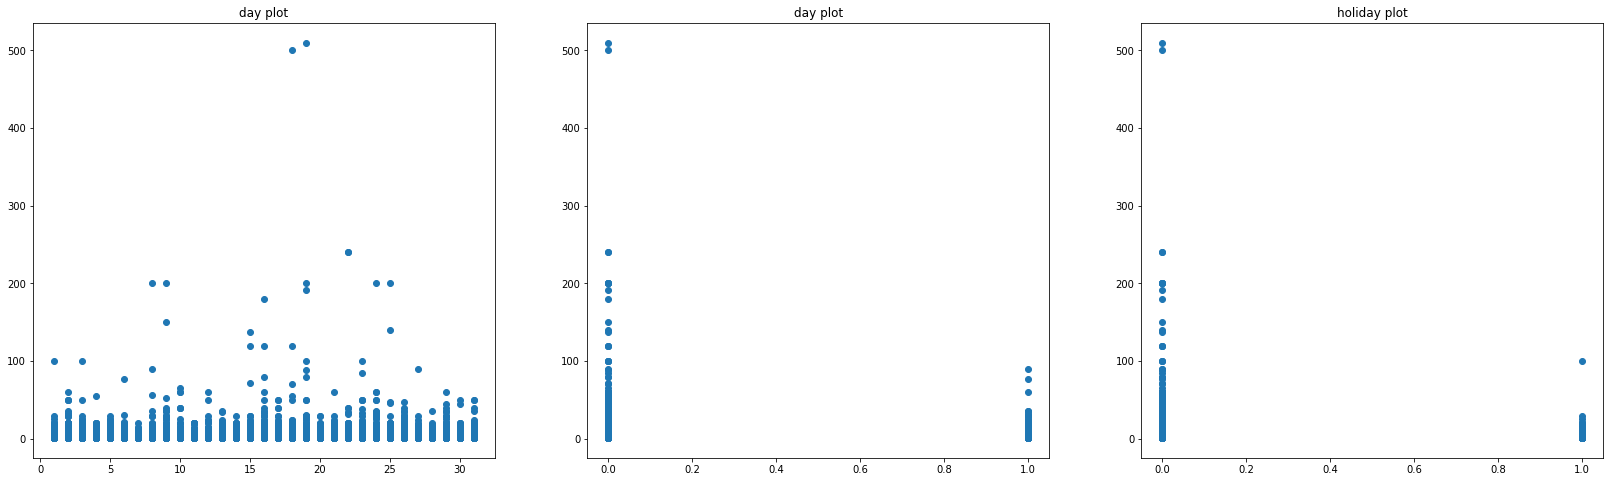

In [ ]:
plt.figure(figsize = (48,8))
plt.subplot(1,5,1)
plt.title('day plot')
plt.plot(march['day'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('day plot')
plt.plot(march['weekend'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('holiday plot')
plt.plot(march['holiday'], march['ITEM_QTY'], 'o')

In [ ]:
march.groupby('weekend').mean()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE,month,day,year,holiday,monday,tuesday,wednesday,thursday,friday,saturday,sunday,1st_week,2nd_week,3rd_week,4th_week,last_week
weekend,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.0,2.021032e+07,94234.035997,9.000141e+07,56942.850602,1.401347,1.310464,39782.067416,2.021032e+13,1.0,2.021032e+07,145590.623619,25.365332,3.0,16.514218,2021.0,0.034883,0.239318,0.28518,0.194186,0.135949,0.145367,0.00000,0.00000,0.236220,0.142358,0.155674,0.337936,0.206335
1,7.0,2.021032e+07,97023.010843,9.000141e+07,58330.958513,1.349999,1.293451,43707.375660,2.021032e+13,1.0,2.021032e+07,143132.563724,24.999142,3.0,17.968833,2021.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.43721,0.56279,0.206558,0.251964,0.246963,0.294515,0.294515


In [ ]:
march['monday'] = march['day'].apply(lambda x : 1 if x % 7 == 1 else 0)
march['tuesday'] = march['day'].apply(lambda x : 1 if x % 7 == 2 else 0)
march['wednesday'] = march['day'].apply(lambda x : 1 if x % 7 == 3 else 0)
march['thursday'] = march['day'].apply(lambda x : 1 if x % 7 == 4 else 0)
march['friday'] = march['day'].apply(lambda x : 1 if x % 7 == 5 else 0)
march['saturday'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else 0)
march['sunday'] = march['day'].apply(lambda x : 1 if x % 7 == 0 else 0)

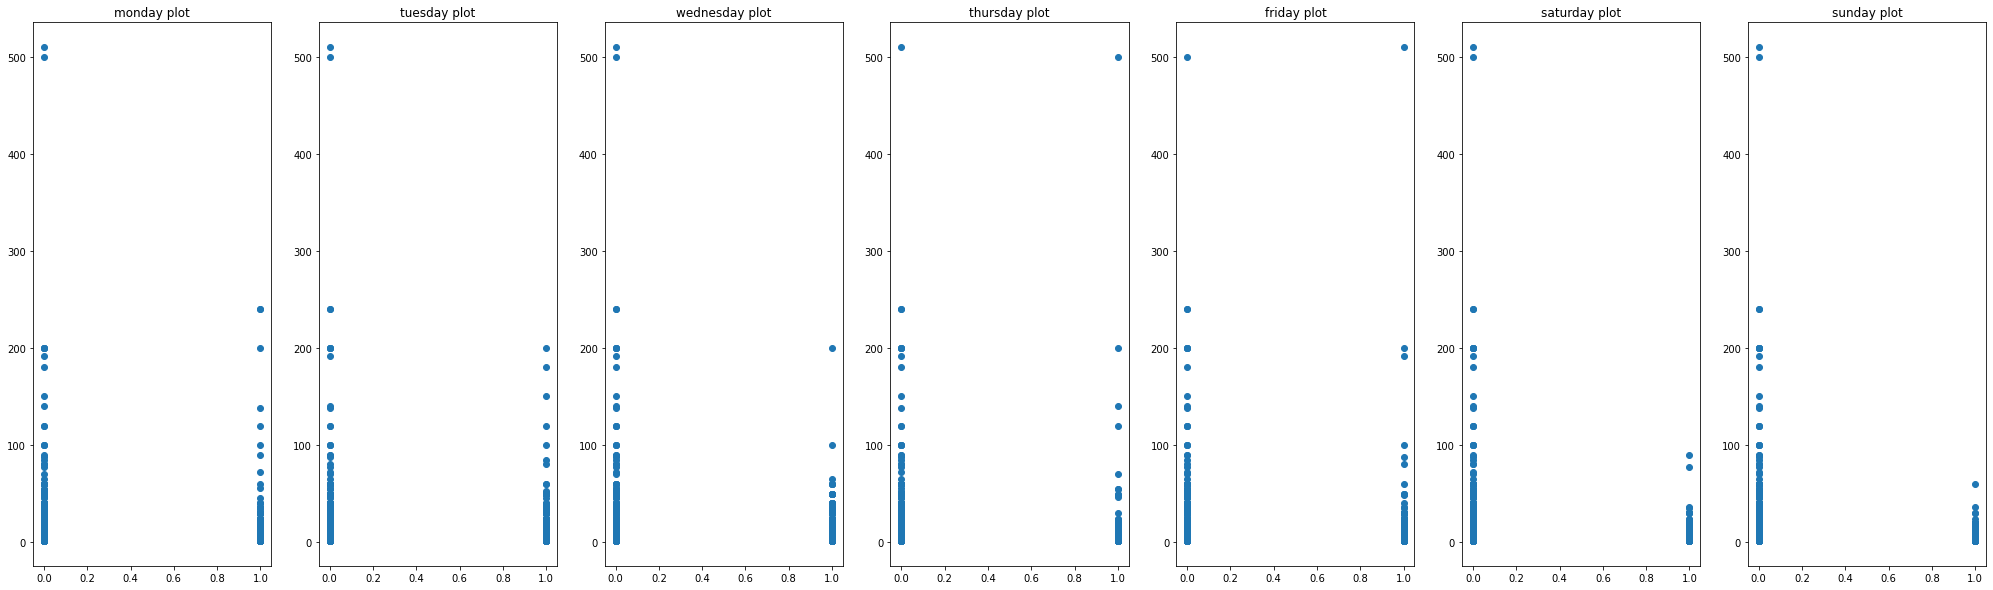

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,7,1)
plt.title('monday plot')
plt.plot(march['monday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,2)
plt.title('tuesday plot')
plt.plot(march['tuesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,3)
plt.title('wednesday plot')
plt.plot(march['wednesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,4)
plt.title('thursday plot')
plt.plot(march['thursday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,5)
plt.title('friday plot')
plt.plot(march['friday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,6)
plt.title('saturday plot')
plt.plot(march['saturday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,7)
plt.title('sunday plot')
plt.plot(march['sunday'], march['ITEM_QTY'], 'o')

In [ ]:
march['1st_week'] = march['day'].apply(lambda x : 1 if x <= 7 else 0)
march['2nd_week'] = march['day'].apply(lambda x : 1 if 8 <= x <= 14 else 0)
march['3rd_week'] = march['day'].apply(lambda x : 1 if 15 <= x <= 21 else 0)
march['4th_week'] = march['day'].apply(lambda x : 1 if 22 <= x <= 28 else 0)
march['last_week'] = march['day'].apply(lambda x : 1 if x >= 25 else 0)

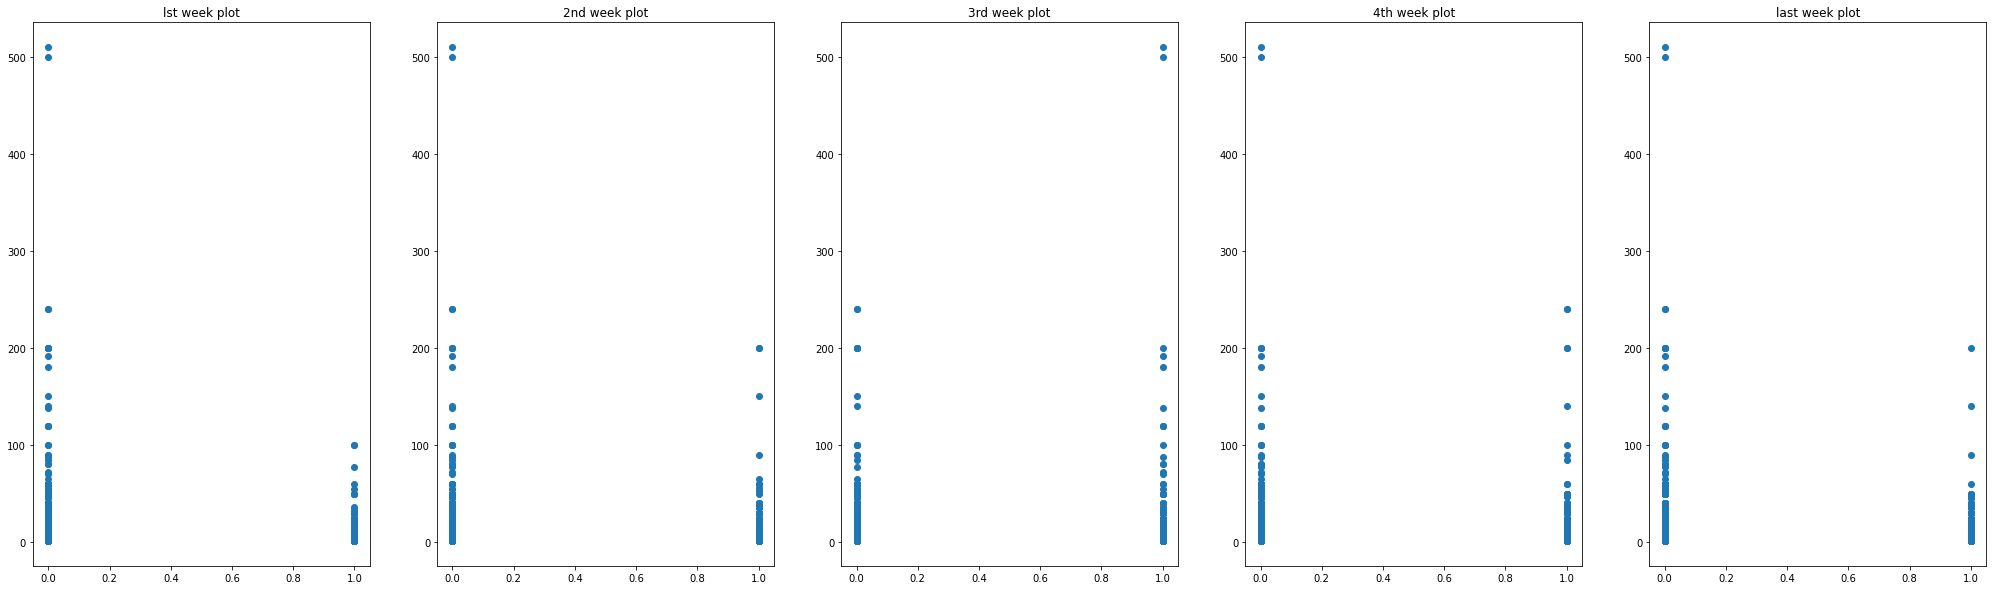

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,5,1)
plt.title('lst week plot')
plt.plot(march['1st_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('2nd week plot')
plt.plot(march['2nd_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('3rd week plot')
plt.plot(march['3rd_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,4)
plt.title('4th week plot')
plt.plot(march['4th_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,5)
plt.title('last week plot')
plt.plot(march['last_week'], march['ITEM_QTY'], 'o')

# 쇼핑몰 코드 EDA

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(df['INS_ID'])
df['INS_ID'] = L_encoder.transform(df['INS_ID'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['INS_ID'].value_counts()
# 뭐지? 했는데 iNEXBatch 말고는 전부 결측치떔에 날라감 ㅡㅡ;

1    1585496
0         28
Name: INS_ID, dtype: int64

In [ ]:
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')